# Bike Sharing Assignment


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings("ignore")

## Reading the data

In [2]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Viewing no. of rows and columns
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Exploratory Data Analysis

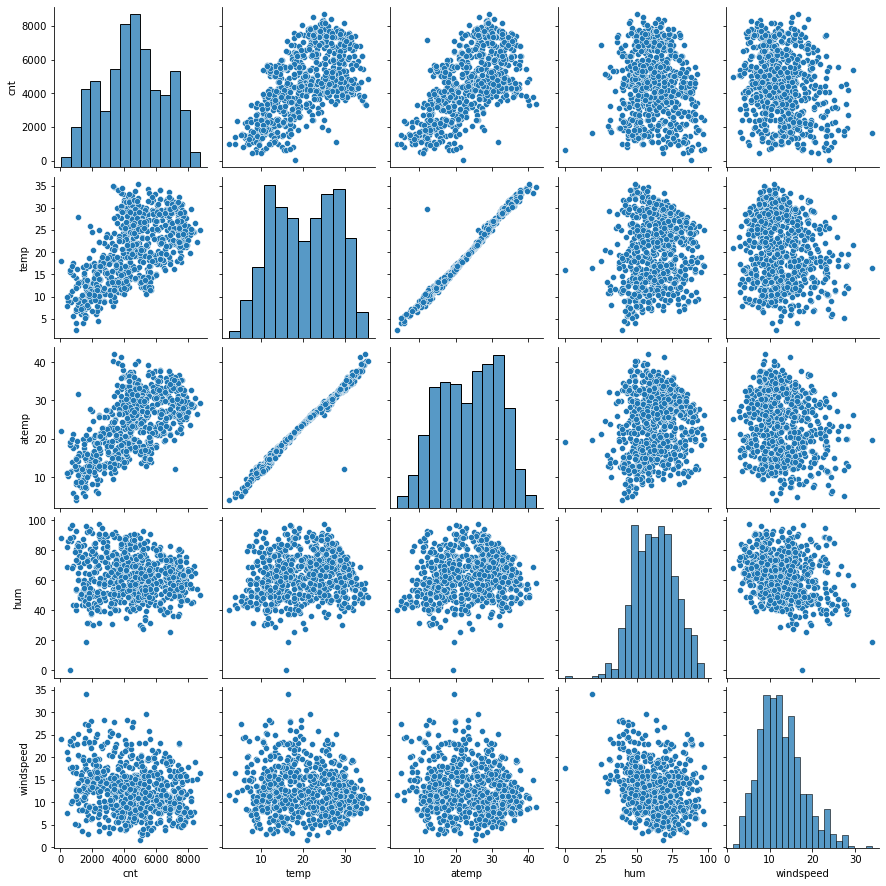

In [5]:
# Pair plot for numeric variables
sns.pairplot(df,vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

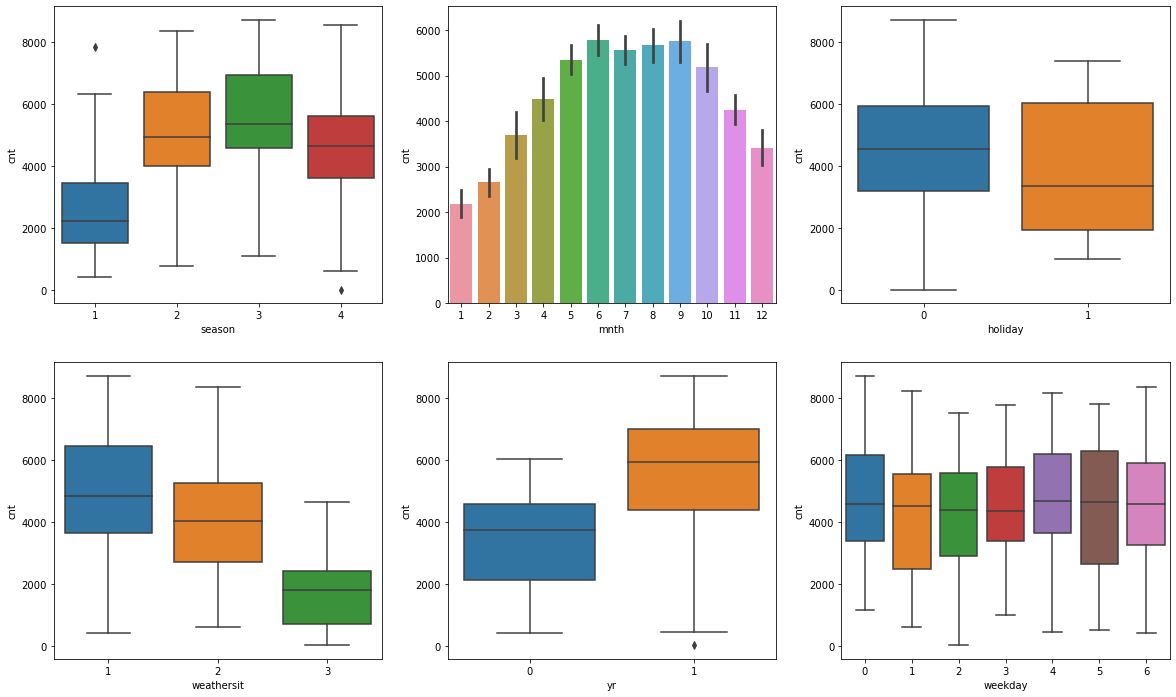

In [6]:
# Plotting graph for categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.barplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

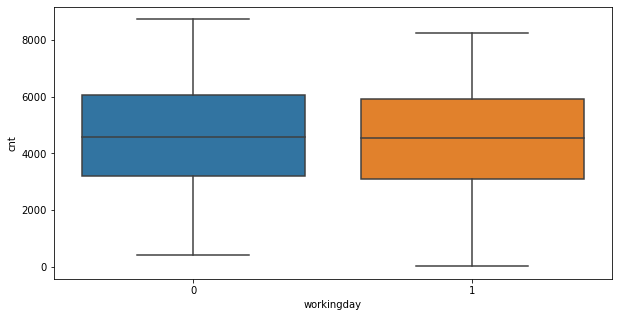

In [7]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

## Missing Values

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the data

## Dropping columns

In [9]:
df.drop("dteday",axis =1,inplace=True)
df.drop("instant",axis =1,inplace=True)
df.drop("atemp",axis =1,inplace=True)
# Dropping the Casual and registered columns as the cnt column is the sum of casual and registerd columns
df.drop("casual",axis =1,inplace=True)
df.drop("registered",axis =1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


## Dummy variables for the analysis

In [10]:
# TO convert variables into dummies,we first need to convert variable into object and then apply pd.get_dummies,because get_dummies takes only object type variable
# Converting int to OBJ
df["season"] = df.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [11]:
df.season.dtypes

dtype('O')

In [12]:
# Dummy variables for mnth variable
df.mnth = df.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,43.6957,12.522300,1600


In [13]:
df.mnth.dtypes

dtype('O')

In [14]:
# Dummy variables for weekend variable
df.weekday = df.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600


In [15]:
df.weekday.dtypes

dtype('O')

In [16]:
# Dummy variables for weathersit variable
df.weathersit = df.weathersit.map({1:"Clear Sky",2:"Misty",3:"Light Snow and Rain",4:"Thunderstorm"})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,1600


In [17]:
df.weathersit.dtypes

dtype('O')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [19]:
# DUMMIES
season_dummy = pd.get_dummies(df.season,drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# concat the dummy column with main datafarme
df = pd.concat([df,season_dummy],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,1600,1,0,0


In [21]:
mnth_dummy = pd.get_dummies(df.mnth,drop_first=True)
mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
# concat the dummy column with main datafarme
df = pd.concat([df,mnth_dummy],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [23]:
weekday_dummy = pd.get_dummies(df.weekday,drop_first=True)
weekday_dummy.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [24]:
# concat the dummy column with main datafarme
df = pd.concat([df,weekday_dummy],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [25]:
weathersit_dummy = pd.get_dummies(df.weathersit)
weathersit_dummy.head()

,Clear Sky,Light Snow and Rain,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
df = pd.concat([df,weathersit_dummy],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df.shape

(730, 34)

In [28]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Clear Sky',
       'Light Snow and Rain', 'Misty'],
      dtype='object')

## Dropping the variables after creating dummy variables

In [29]:
df.drop("season",axis =1,inplace=True)
df.drop("mnth",axis =1,inplace=True)
df.drop("weekday",axis =1,inplace=True)
df.drop("weathersit",axis =1,inplace=True)

In [30]:
df.shape

(730, 30)

In [31]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Correlation between the variables

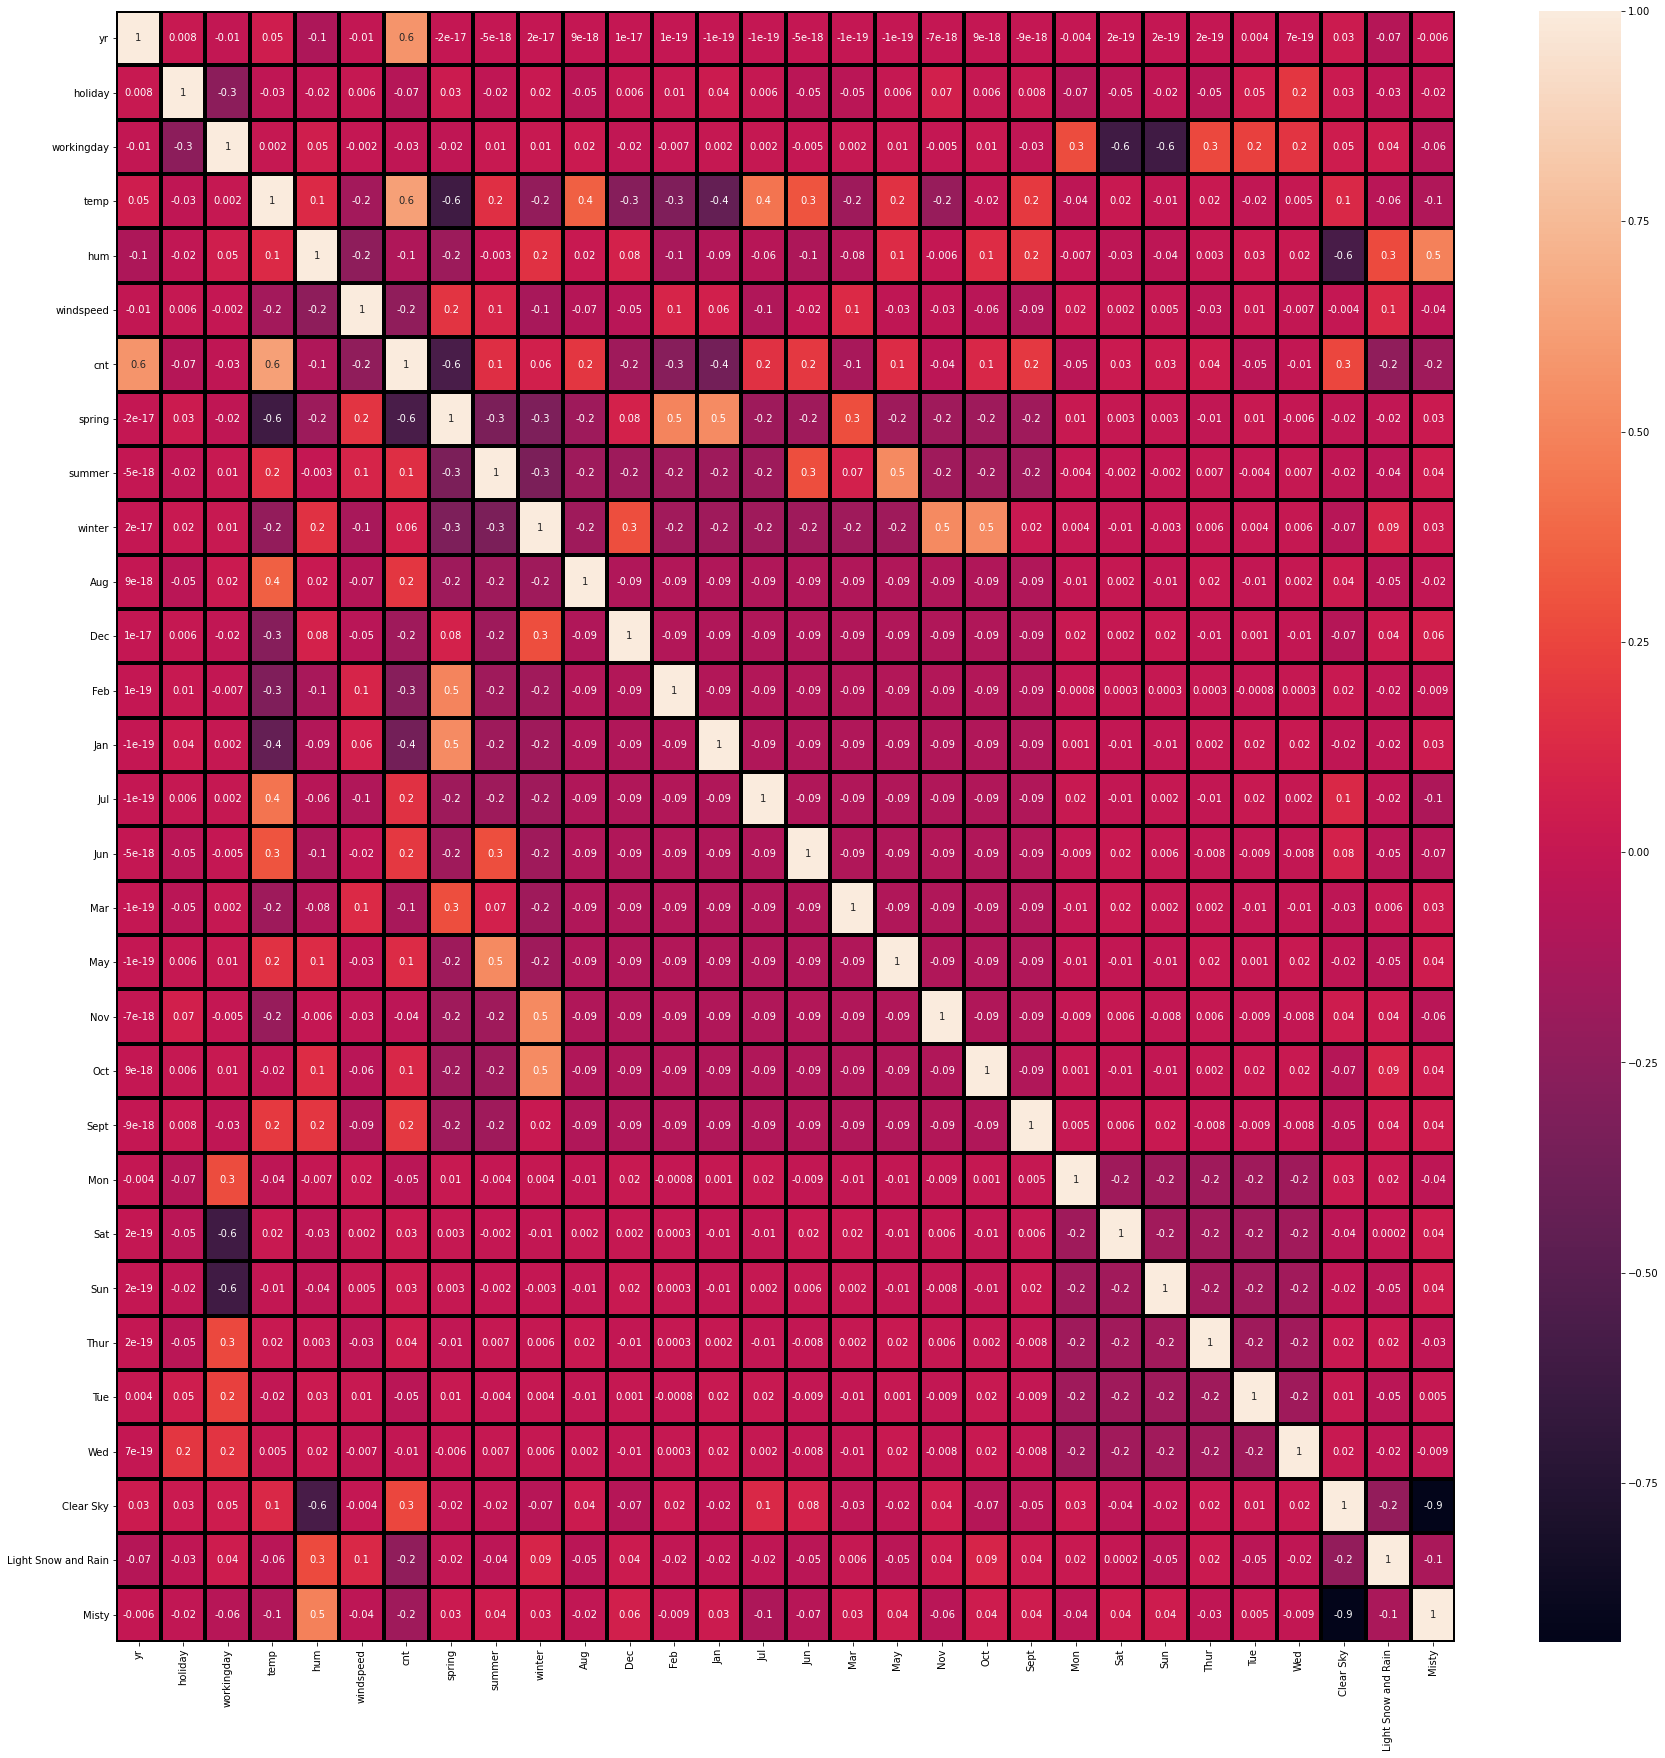

In [32]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot=True,fmt='.1g', linewidths=3, linecolor='black')
plt.show()

In [33]:
df.corrwith(df["cnt"])

yr                     0.569728
holiday               -0.068764
workingday            -0.027640
temp                   0.627044
hum                   -0.098543
windspeed             -0.235132
cnt                    1.000000
spring                -0.561702
summer                 0.145325
winter                 0.064619
Aug                    0.182100
Dec                   -0.173878
Feb                   -0.273848
Jan                   -0.367167
Jul                    0.166236
Jun                    0.195568
Mar                   -0.128456
May                    0.132553
Nov                   -0.040344
Oct                    0.108846
Sept                   0.194664
Mon                   -0.052581
Sat                    0.025004
Sun                    0.033227
Thur                   0.038672
Tue                   -0.049471
Wed                   -0.013282
Clear Sky              0.251010
Light Snow and Rain   -0.240602
Misty                 -0.170686
dtype: float64

## Train Test Split

In [34]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)

In [35]:
df_train.shape

(510, 30)

In [36]:
df_test.shape

(220, 30)

## Scaling the data

In [37]:
# MinMax Scaling
# 1. Initiating the scaler method
scaler=MinMaxScaler()
numlist=["temp","hum","windspeed","cnt"]
# 2. Fit on data
df_train[numlist] = scaler.fit_transform(df_train[numlist])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
# X_train and y_train
y_train = df_train.pop("cnt")
X_train = df_train

## Building the model using RFE

In [39]:
# Importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 12)           
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 18),
 ('May', False, 12),
 ('Nov', False, 4),
 ('Oct', False, 16),
 ('Sept', True, 1),
 ('Mon', False, 11),
 ('Sat', False, 8),
 ('Sun', False, 9),
 ('Thur', False, 17),
 ('Tue', False, 10),
 ('Wed', False, 14),
 ('Clear Sky', True, 1),
 ('Light Snow and Rain', True, 1),
 ('Misty', False, 2)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jul', 'Sept', 'Clear Sky', 'Light Snow and Rain'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Misty'],
      dtype='object')

## Building Model using Statsmodel for manual elimination of variables

### Calculating Model 1

In [44]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.95e-190
Time:                        14:33:42   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2321    

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.23
6,spring,5.02
3,temp,3.61
8,winter,3.48
7,summer,2.62
4,hum,1.89
11,Clear Sky,1.61
9,Jul,1.48
10,Sept,1.30
5,windspeed,1.19


In [49]:
# P value is <0.05 and Vif is greater that 5, removing const
X_train_new = X_train_rfe.drop(["const"],axis =1)
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jul', 'Sept', 'Clear Sky', 'Light Snow and Rain'],
      dtype='object')

In [50]:
# Calculate the VIFs for the model again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.89
2,temp,18.79
5,spring,4.65
4,windspeed,4.64
7,winter,3.70
10,Clear Sky,3.41
6,summer,2.94
0,yr,2.07
8,Jul,1.59
9,Sept,1.39


In [51]:
# Removing hum variable because it has VIF value greater than 5
X_train_new = X_train_new.drop(["hum"],axis =1)
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Jul', 'Sept', 'Clear Sky', 'Light Snow and Rain'],
      dtype='object')

### Calculating Model 2

In [52]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_new)

In [53]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [54]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          5.06e-187
Time:                        14:33:43   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1193    

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.77
3,windspeed,4.62
9,Clear Sky,2.84
5,summer,2.19
4,spring,2.12
0,yr,2.07
6,winter,1.77
7,Jul,1.59
8,Sept,1.33
10,Light Snow and Rain,1.12


In [56]:
# Here the temp variable is an important varibale so I am trying to remove next variable in the list i.e "windspeed"
X_train_new = X_train_new.drop(["windspeed"],axis =1)
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Jul', 'Sept',
       'Clear Sky', 'Light Snow and Rain'],
      dtype='object')

### Calculating Model 3

In [57]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          5.71e-181
Time:                        14:33:44   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0716    

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
8,Clear Sky,2.82
0,yr,2.06
4,summer,1.91
6,Jul,1.59
5,winter,1.57
3,spring,1.48
7,Sept,1.33
9,Light Snow and Rain,1.10
1,holiday,1.04


#### Here the temp is an important variable, so keeping the temp variable and also it is very close to 5 

## Residual Analysis of the train data

In [59]:
# Prediction
y_train_pred = lm.predict(X_train_rfe)

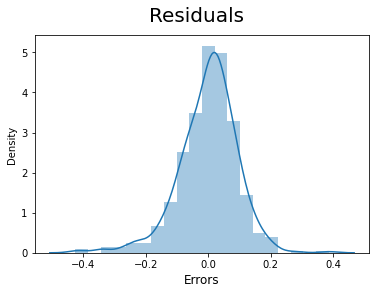

In [60]:
#Plotting distplot for residuals
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residuals', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)
plt.show()

## Prediction Analysis

In [61]:
# MinMax Scaling
numlist=["temp","hum","windspeed","cnt"]
# We transform the data on a test data
# Transform on data
df_test[numlist] = scaler.transform(df_test[numlist])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [62]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Creating X_test and y_test variables
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
# Now let's use my model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)
X_test_new.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [65]:
# Creating variables which are present in train dataset
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,yr,holiday,temp,spring,summer,winter,Jul,Sept,Clear Sky,Light Snow and Rain
184,0,1,0.831783,0,0,0,1,0,0,0
535,1,0,0.901354,0,1,0,0,0,1,0
299,0,0,0.511964,0,0,1,0,0,0,0
221,0,0,0.881625,0,0,0,0,0,1,0
152,0,0,0.817246,0,1,0,0,0,1,0


In [66]:
# Adding a constant to test dataset 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,temp,spring,summer,winter,Jul,Sept,Clear Sky,Light Snow and Rain
184,1.0,0,1,0.831783,0,0,0,1,0,0,0
535,1.0,1,0,0.901354,0,1,0,0,0,1,0
299,1.0,0,0,0.511964,0,0,1,0,0,0,0
221,1.0,0,0,0.881625,0,0,0,0,0,1,0
152,1.0,0,0,0.817246,0,1,0,0,0,1,0


In [67]:
# Predicting variables used in final model buiding
y_test_pred = lm.predict(X_test_new)
y_test_pred

184    0.337341
535    0.872633
299    0.411976
221    0.593462
152    0.597735
         ...   
702    0.726687
127    0.480760
640    0.762071
72     0.240236
653    0.721987
Length: 220, dtype: float64

In [68]:
# Calculate r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)


0.809266029413224

In [69]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
mse

0.009119807381204645

In [70]:
# Here we can observe that the R2 value for train data is 82.4% and for test data is 80.9%

## Model Evaluation

Text(0, 0.5, 'y_pred')

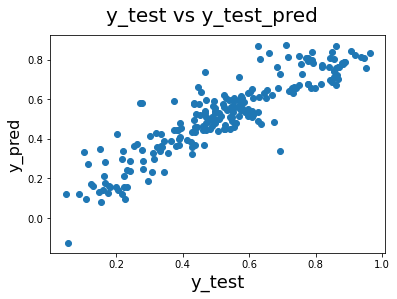

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)  

In [72]:
# Checking the co-efficients of the variables for the respective independent variables
coeff = lm.params
coeff.sort_values(ascending = False)

temp                   0.502913
yr                     0.232598
winter                 0.082879
Sept                   0.081182
Clear Sky              0.078458
const                  0.071623
summer                 0.036651
Jul                   -0.052338
spring                -0.076589
holiday               -0.100259
Light Snow and Rain   -0.220486
dtype: float64

## Conclusion point for the bike sharing data

From the about data, we can observe that 
- Temp variable has the highest co-efficient
- Light Snow and Rain variable has the lowest co-efficient
- Top 3 variables [Temp, yr, winter] are highest in the list
- The demand of bikes reduce in Spring season and during holidays